<a href='http://www.scienceacademy.ca'> <img style="float: left;height:70px" src="Log_SA.jpeg"></a>

# Project Solutions -- KNN 

###  Breast Cancer Diagnostic
In this project, we are going to work with another very famous and real dataset on [Breast Cancer Wisconsin (Diagnostic)](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/data). The dataset is available on kaggle and originally belong to [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29).<br>
This dataset was donated to UCI by **Nick Street in 1995** for the public use. [Relevant Papers](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) and [detailed description](https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.names) on the dataset is provided at UCI website.<br>

We have worked with this data in our Logistic Regression project, let's see how the **KNN** model works for this dataset.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("Breast_Cancer_Diagnostic.csv")
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

We will only consider ten real-valued features in this project for diagnostic!<br>
**Please separate the required features along with diagnosis column (list of the columns is bewlow) and display the head of the data.**<br>
`['radius_mean', 'texture_mean', 'perimeter_mean','area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean','concave points_mean', 'symmetry_mean', 'fractal_dimension_mean','diagnosis']`

In [3]:
# code her please so than you don't lose the existing output 

In [4]:
df = df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean','diagnosis']]
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,M


**Get the overview of your data using info, is there any missing value?**

In [5]:
# code her please so than you don't lose the existing output 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
radius_mean               569 non-null float64
texture_mean              569 non-null float64
perimeter_mean            569 non-null float64
area_mean                 569 non-null float64
smoothness_mean           569 non-null float64
compactness_mean          569 non-null float64
concavity_mean            569 non-null float64
concave points_mean       569 non-null float64
symmetry_mean             569 non-null float64
fractal_dimension_mean    569 non-null float64
diagnosis                 569 non-null object
dtypes: float64(10), object(1)
memory usage: 49.0+ KB


**Which type of breast cancer is common?**

In [7]:
# code her please so than you don't lose the existing output 

In [8]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

** Standardize the variable/features to get your data ready for knn**<br>
** import `StandardScaler`**

In [9]:
# code her please so than you don't lose the existing output 

In [10]:
from sklearn.preprocessing import StandardScaler

**Create instance `scaler`**

In [11]:
# code her please so than you don't lose the existing output 

In [12]:
scaler = StandardScaler()

**Split the data into `features` and `target` to fit the `scaler` to the features only!**

In [13]:
# code her please so than you don't lose the existing output 

In [14]:
features = df.drop('diagnosis',axis=1)
target = df['diagnosis']

** Fit `scaler` to the features now!**

In [15]:
# code her please so than you don't lose the existing output 

In [16]:
scaler.fit(features)

StandardScaler(copy=True, with_mean=True, with_std=True)

** Please get the scaled features into `scaled_features` **

In [17]:
# code her please so than you don't lose the existing output 

In [18]:
scaled_features = scaler.transform(features)

** Do the train_test split** <br>Please use `test_size=0.33, random_state=42`

In [19]:
# code her please so than you don't lose the existing output 

In [20]:
from sklearn.model_selection import train_test_split
X = scaled_features
y = target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

**import the `KNeighborsClassifier`**

In [21]:
# code her please so than you don't lose the existing output 

In [22]:
from sklearn.neighbors import KNeighborsClassifier 

** Create a KNN model instance with n_neighbors=1**

In [23]:
# code her please so than you don't lose the existing output 

In [24]:
knn = KNeighborsClassifier(n_neighbors=1) 

**Fit the model to the training data**

In [25]:
# code her please so than you don't lose the existing output 

In [26]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

**Do the predictions for the test data**

In [27]:
# code her please so than you don't lose the existing output 

In [28]:
predictions = knn.predict(X_test)

** Print confusion matrix and classification report**

In [29]:
# code her please so than you don't lose the existing output 

In [30]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[114   7]
 [  6  61]]
             precision    recall  f1-score   support

          B       0.95      0.94      0.95       121
          M       0.90      0.91      0.90        67

avg / total       0.93      0.93      0.93       188



**Using Elbow method, find the best value of k**<br>
Use k from 1 to 100, do you think increasing k above the certain value is better for your model?

In [31]:
# code her please so than you don't lose the existing output 

In [32]:
err_rate = []

for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    prediction_i = knn.predict(X_test)
    err_rate.append(np.mean(prediction_i != y_test))

**Plot the error rate Vs k to see which value have the lowest error rate**

In [33]:
# code her please so than you don't lose the existing output 

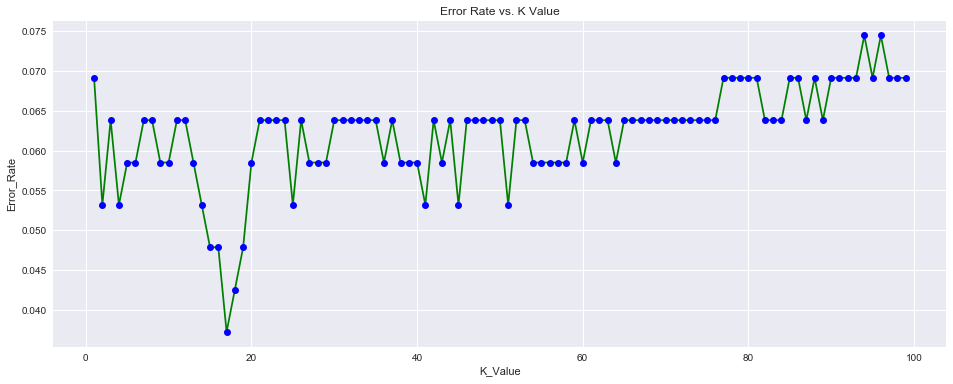

In [34]:
plt.figure(figsize=(16,6))
plt.plot(range(1,100),err_rate,color='green', 
         marker='o',markerfacecolor='blue')
plt.title('Error Rate vs. K Value')
plt.xlabel('K_Value')
plt.ylabel('Error_Rate')

**Using k for the minimum error rate, do the predictions and print confusion matrix and classification report**

In [35]:
# code her please so than you don't lose the existing output 

In [36]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[118   3]
 [  4  63]]
             precision    recall  f1-score   support

          B       0.97      0.98      0.97       121
          M       0.95      0.94      0.95        67

avg / total       0.96      0.96      0.96       188



## Great Job!
More data you have, the better you can train your model!